In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Initializing Tensor

In [2]:
t = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32, device=device, requires_grad=False)

print(t)
print(t.shape)
print(t.dtype)
print(t.device)
print(t.requires_grad)


tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])
torch.float32
cpu
False


In [3]:
t = torch.empty(size=(3, 3))  # initialize a empty tensor, these will be random values
t

tensor([[-1.9823e+00,  4.5580e-41,  4.6985e-37],
        [ 0.0000e+00,  4.4842e-44,  0.0000e+00],
        [ 4.4842e-44,  0.0000e+00,  0.0000e+00]])

In [4]:
# other common initialization methods
t = torch.zeros((3, 3))
t = torch.rand((3, 3))
t = torch.ones((3, 3))
t = torch.eye(3, 3)

In [5]:
t = torch.diag(torch.ones(3))
t

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [6]:
t = torch.arange(start=0, end=5, step=1)
t

tensor([0, 1, 2, 3, 4])

In [7]:
t = torch.linspace(start=0.1, end=1, steps=5)
t

tensor([0.1000, 0.3250, 0.5500, 0.7750, 1.0000])

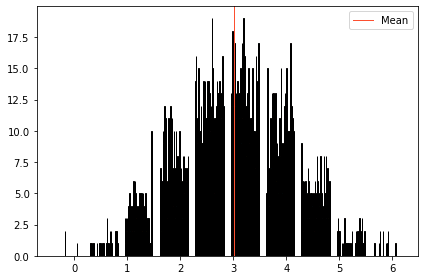

mean: 3.0129292011260986
std: 0.9961850047111511


In [8]:
# normal distribution with mean=3 and std=1
t = torch.empty(size=(50, 50)).normal_(mean=3, std=1)

plt.hist(t.numpy(), edgecolor='black')
plt.axvline(t.mean().item(), color='#fc4f30', label='Mean', linewidth=1)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

print(f'mean: {t.mean()}')
print(f'std: {t.std()}')

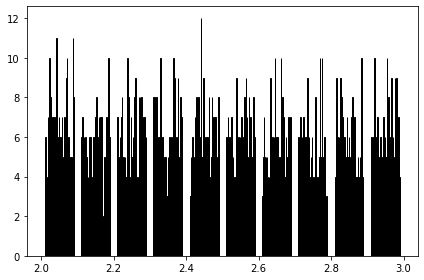

In [9]:
# uniform distribution between 2 and 3
t = torch.empty(size=(50, 50)).uniform_(2, 3)

plt.hist(t.numpy(), edgecolor='black')
plt.tight_layout()
plt.show()
plt.close()

In [10]:
# initialize and convert tensors to other types (int, float, double)
t = torch.arange(4)

print(t.dtype)
print(t.short().dtype)
print(t.long().dtype)
print(t.half().dtype)
print(t.float().dtype)
print(t.double().dtype)
print(t.bool())

torch.int64
torch.int16
torch.int64
torch.float16
torch.float32
torch.float64
tensor([False,  True,  True,  True])


In [11]:
# array to tensor conversion and vice-versa
n = np.zeros((5, 5))
print(type(n))
t = torch.from_numpy(n)
print(type(t))
n = t.numpy()
print(type(n))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
<class 'numpy.ndarray'>


## Tensor Math and Comparision Operations

In [ ]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([1, 4, 7])

In [ ]:
c = a + b
c = a - b
c = a * b  # element-wise multiplication
c = a.dot(b)  # dot product
c = torch.eq(a, b)  # element-wise comparision
c = torch.true_divide(a, b)  # element-wise division

In [ ]:
# inplace operations

t = torch.zeros(3)
t.add_(a)  # or
t += a  # inplace
t = t + a  # not inplace

In [ ]:
# exponentiation

c = a.pow(2)  # element-wise # or
c = a ** 2


In [ ]:
# simple comparison

c = a > 0
c = a < 0

In [ ]:
# matrix multiplication

a = torch.rand((2, 5))
b = torch.rand((5, 3))
c = torch.mm(a, b)  # or
c = a.mm(b)

In [12]:
# batch matrix multiplication
b, l, m, n = 32, 3, 4, 5

t1 = torch.rand((b, l, m))
t2 = torch.rand((b, m, n))
t3 = torch.bmm(t1, t2)

print(t1.shape)
print(t2.shape)
print(t3.shape)


torch.Size([32, 3, 4])
torch.Size([32, 4, 5])
torch.Size([32, 3, 5])


In [ ]:
# broadcasting

t1 = torch.rand((5, 5))
t2 = torch.rand((1, 5))

t3 = t1 - t2
t3 = t1 ** t2

In [13]:
# other useful tensor operations
t = torch.tensor(
        [
            [
                [1, 2, 3],
                [4, 5, 6]
            ],
            [
                [7, 8, 9],
                [1, 4, 7]
            ]
        ]
    )


In [ ]:
sum_t = torch.sum(t, dim=0)
mean_t = torch.mean(t.float(), dim=0)
values, indices = torch.max(t, dim=0)
values, indices = torch.min(t, dim=0)
indices = torch.argmax(t, dim=0)
indices = torch.argmin(t, dim=0)

In [14]:
print(f'num_elements: {t.numel()}')
print(f'shape: {t.shape}')
print(f'num_dims: {len(t.shape)}')

for i in range(t.ndimension()):
    print(f'\ndim={i}:')
    print(f'sum:\n{t.sum(dim=i).data}')
    print(f'max:\n{t.max(dim=i).values}')


num_elements: 12
shape: torch.Size([2, 2, 3])
num_dims: 3

dim=0:
sum:
tensor([[ 8, 10, 12],
        [ 5,  9, 13]])
max:
tensor([[7, 8, 9],
        [4, 5, 7]])

dim=1:
sum:
tensor([[ 5,  7,  9],
        [ 8, 12, 16]])
max:
tensor([[4, 5, 6],
        [7, 8, 9]])

dim=2:
sum:
tensor([[ 6, 15],
        [24, 12]])
max:
tensor([[3, 6],
        [9, 7]])


In [15]:
print(t.clamp(min=0, max=5))  # e.g. set values more than 5 to 5

tensor([[[1, 2, 3],
         [4, 5, 5]],

        [[5, 5, 5],
         [1, 4, 5]]])


In [16]:
t = torch.tensor([1, 0, 1, 1], dtype=torch.bool)

print(t.any())  # is any one is True
print(t.all())  # are all of them True

tensor(True)
tensor(False)


## Tensor Indexing

In [17]:
batch_size = 10
features = 24
t = torch.rand((batch_size, features))

print(t.shape)
print(t[0].shape)  # or t[0, :]
print(t[:, 0].shape)
print(t[2, :4].shape)

ax1 = torch.tensor([1, 0])
ax2 = torch.tensor([4, 2])
print(t[ax1, ax2].shape)

torch.Size([10, 24])
torch.Size([24])
torch.Size([10])
torch.Size([4])
torch.Size([2])


In [18]:
t = torch.arange(10)
indices = [2, 5, 8]

print(t[indices])
print(t[(t < 2) | (t > 8)])
print(t[t.remainder(3) == 0])

tensor([2, 5, 8])
tensor([0, 1, 9])
tensor([0, 3, 6, 9])


In [19]:
print(torch.where(t>4, t, t*2))  # if t>5 keep it as is, else make it t*2

tensor([0, 2, 4, 6, 8, 5, 6, 7, 8, 9])


In [20]:
print(torch.tensor([0, 0, 1, 2, 2, 2, 4, 3, 3]).unique())

tensor([0, 1, 2, 3, 4])


## Tensor Reshaping

In [21]:
t = torch.arange(9)

print(t.view(3, 3))  # view acts on contiguous tensors (elements are stored contiguously in memory)
print(t.reshape(3, 3))  # reshape may introduce some performance loss

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [22]:
a = t.view(3, 3).t()  # transpose (it's not contiguous now)

try:
    print(a.view(9))  # we will get an error
    print('> from try')
except:
    print(a.contiguous().view(9))  # this will work
    print('> from except')


tensor([0, 3, 6, 1, 4, 7, 2, 5, 8])
> from except


In [23]:
t = torch.tensor(
        [
            [
                [1, 2, 3],
                [4, 5, 6]
            ],
            [
                [7, 8, 9],
                [1, 4, 7]
            ]
        ]
    )

print(t.shape)
for i in range(t.ndimension()):

    print(torch.cat((t, t), dim=i).shape)

torch.Size([2, 2, 3])
torch.Size([4, 2, 3])
torch.Size([2, 4, 3])
torch.Size([2, 2, 6])


In [24]:
batch = 32
t = torch.rand((batch, 3, 32 ,32))
print(t.view(batch, -1).shape)

torch.Size([32, 3072])


In [25]:
t = torch.arange(10)
print(t.unsqueeze(dim=0))
print(t.unsqueeze(dim=0).shape)
print(t.unsqueeze(dim=1))
print(t.unsqueeze(dim=1).shape)

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
torch.Size([1, 10])
tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])
torch.Size([10, 1])


In [26]:
t = torch.arange(10).unsqueeze(dim=1)
print(t.squeeze(dim=1))
print(t.squeeze(dim=1).shape)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
torch.Size([10])
